In [29]:
import pandas as pd
import matplotlib.pyplot as plt

When plotting charts on a jupyter notebook we can use an extension to make sure that the plots render inline

In [30]:
%matplotlib notebook

The dataset we are going to use is a variation of the Online Retail Dataset ([source](http://archive.ics.uci.edu/ml/datasets/online+retail))

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [31]:
data = pd.read_csv("../data/online_orders.csv")

In [32]:
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


The dataset consists of the following fields.

- *country*: Country name
- *date*: Date the row is showing a summary of
- *sales*: Total sales revenue (in UK pounds) for that country and date
- *n_items*: Number of items sold
- *n_orders*: Number of different online orders
- *day_of_week*: Day of week


### Line Charts

We use line charts generally when we want to see the trend of one (or many variables) over time. For example, lets say we want to see the sales in germany compared to france over time. Pandas `plot` method tries a line plot by default.

We can set the index of the dataframe to the date and pandas plot method will automatically pick it up as the x axis

In [33]:
data_indexed = data.set_index('date')

In [34]:
data_indexed.head()

,country,sales,n_items,n_orders,day_of_week
date,,,,,
2010-12-01,Australia,358.25,107,1,2
2010-12-08,Australia,258.90,214,1,2
2010-12-17,Australia,415.70,146,1,4
2011-01-06,Australia,7154.38,4802,2,3
2011-01-10,Australia,81.60,96,1,0


Pandas plotting library is just a thin wrapper around matplotlib. Matplotlib has a somewhat convoluted api, and pandas makes plotting common charts much easier.

For example, here we call directly matplotlib `legend` to display the legend on top of pandas plots

<IPython.core.display.Javascript object>


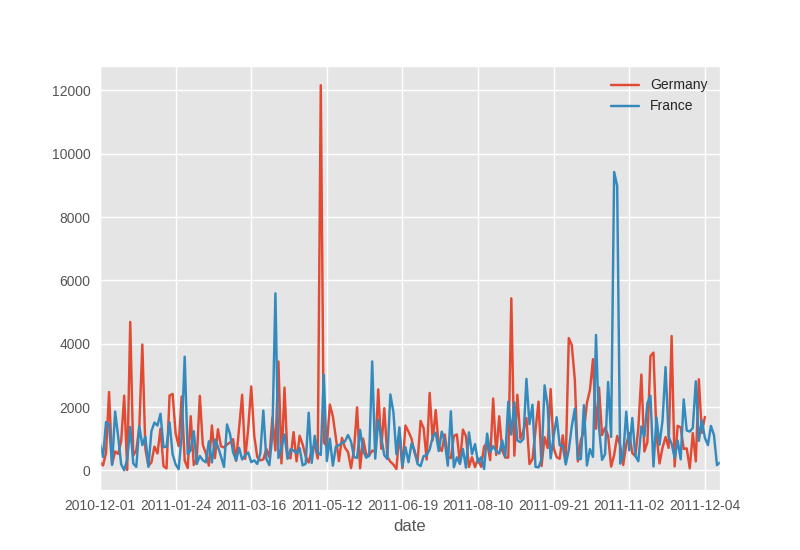

In [35]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend();

We see that sales numbers in France and Germany are generally similar. And that each country has a spike of sales at a certain day in 2011

### Scatter plots

We can use a scatter plot to see the relationship between the number of items sold and the total sales revenue

<IPython.core.display.Javascript object>


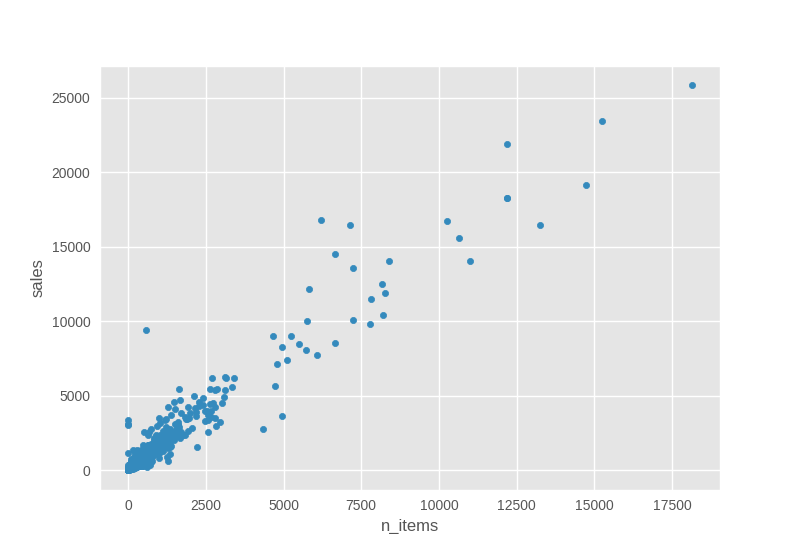

In [36]:
data.plot.scatter(x='n_items', y='sales');

No surprises here, we see that there is a linear relationship between the number of items purchased and the sales revenue

We can use matplotlib `plt.plot` method directly as well. This gives us much more flexibility regarding how we can display the data

<IPython.core.display.Javascript object>


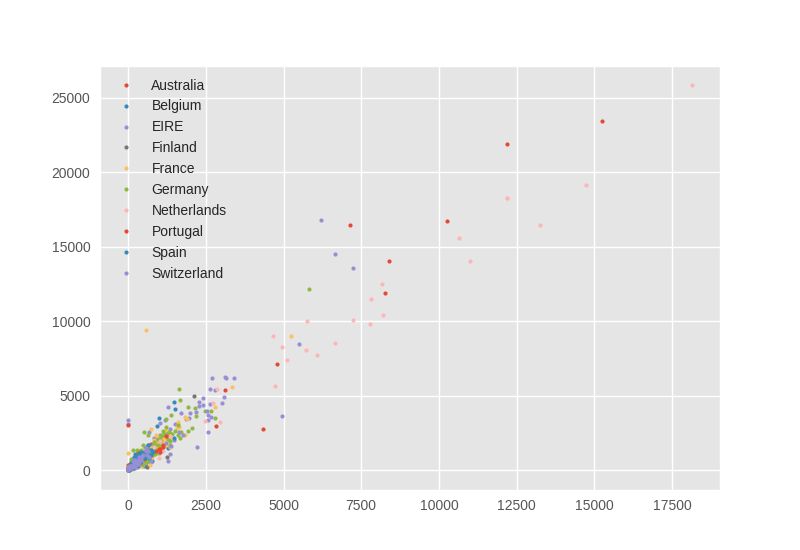

In [37]:
for country in data.country.unique():
    plt.plot(data[data.country == country].n_items,  # plot this series as the x
             data[data.country == country].sales,    #plot this series as the y
             marker='o',   #make the markers circle shaped
             linestyle='', #dont connect the dots with lines
             ms=3,         # size of the parkers (in pixels)
             label=country # use the country as the label of this plot
            )

plt.legend();

We can see for example how do sales relate to the day of week

<IPython.core.display.Javascript object>


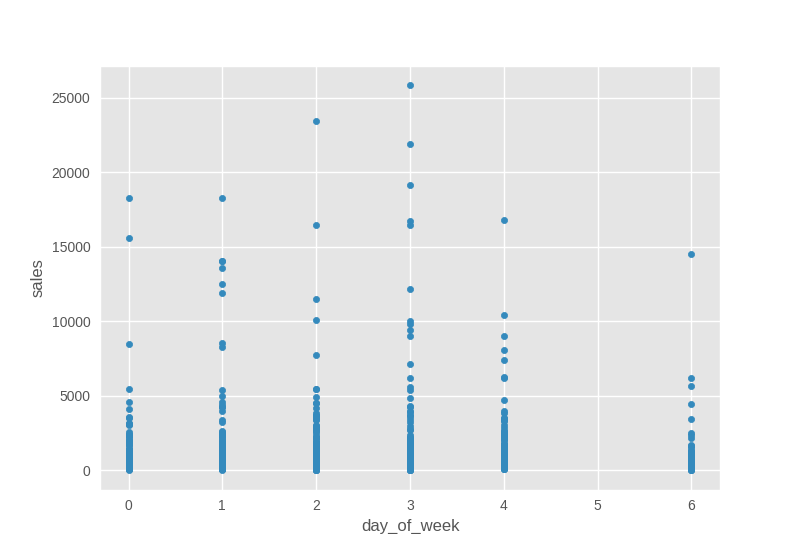

In [38]:
data.plot.scatter(x='day_of_week', y="sales");

We can see that sales are generally equaly distributed, except a little uptick on Thursdays and no sales at all on Saturday! This would be cause for an indepth QA of the data (online sales dont usually stop on saturdays)

# Bar chart

<IPython.core.display.Javascript object>


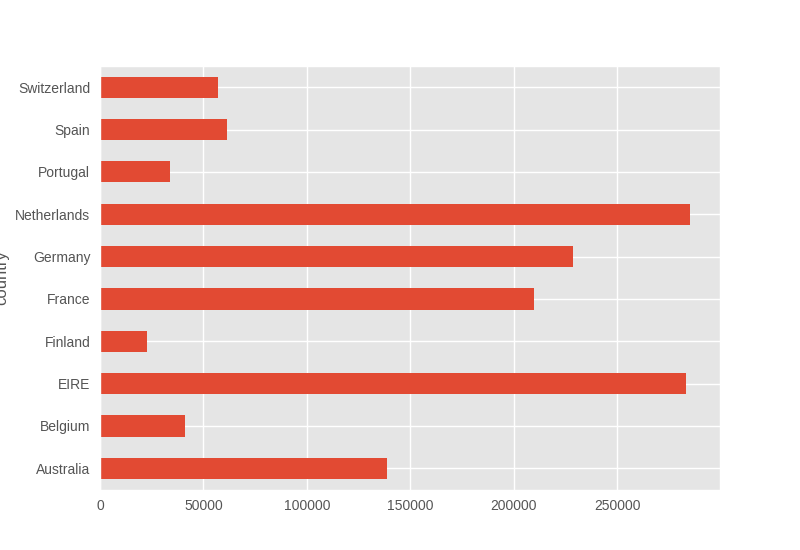

In [39]:
data.groupby('country')['sales'].sum().plot.barh();

Here we can see that the top countries in terms of sales on the dataset are Netherlands, Germany and EIRE. This does not mean that they are the top countries in terms of sales, because remember, the dataset consist of country + date. 

### BoxPlot

<IPython.core.display.Javascript object>


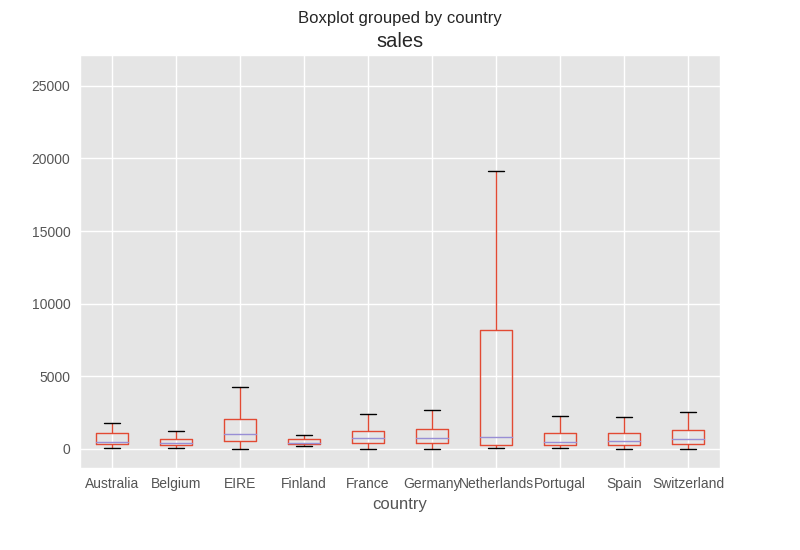

In [40]:
data.boxplot(column="sales", by="country");

Here we see that the top countries in terms of points (France, Germany and Eire) have a significant number of outliers in terms of sales. Netherlands on the other hand, has sales that are more stable (probably a smaller number of bigger orders)

### Histograms

We can use histograms to make sure that nothing is fishy with the data, as well as to gain an understanding of its distribution. For example, we can use it to see how are sales distributed in EIRE

<IPython.core.display.Javascript object>


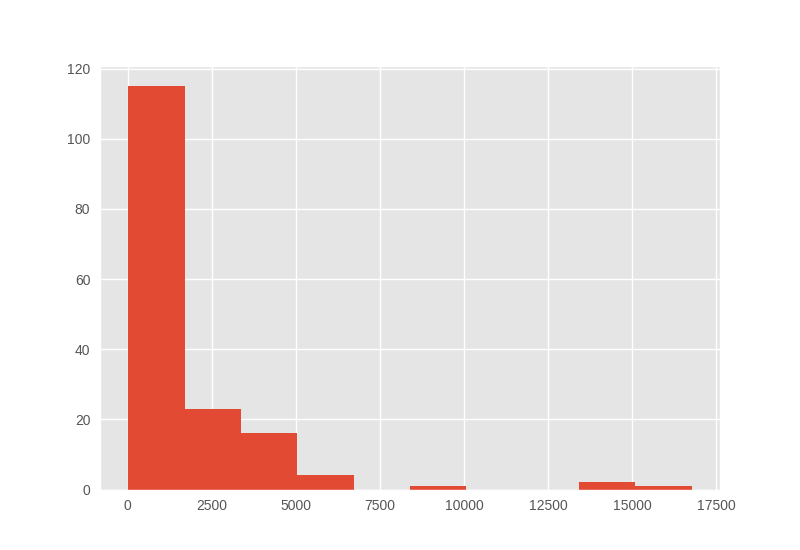

In [41]:
data[data.country=='EIRE'].sales.hist();

Here we can see that, even though the big majority of sales days in EIRE are less than 2500 GBP, some days there are significantly higher sales.

We can limit the extend of the xaxis of a histogram by passing the parameter `xlim` to the plot

<IPython.core.display.Javascript object>


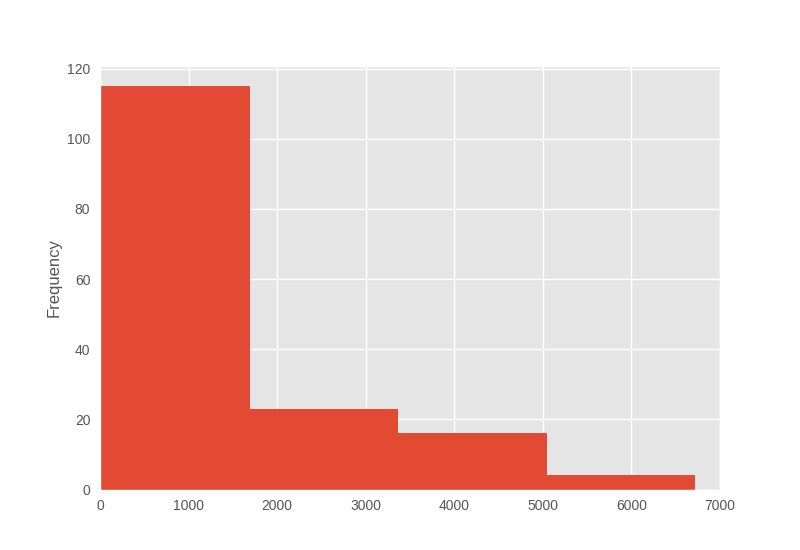

In [42]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000));

We can also specify the number of *groups* of the histogram by using the paramenter `bins`

<IPython.core.display.Javascript object>


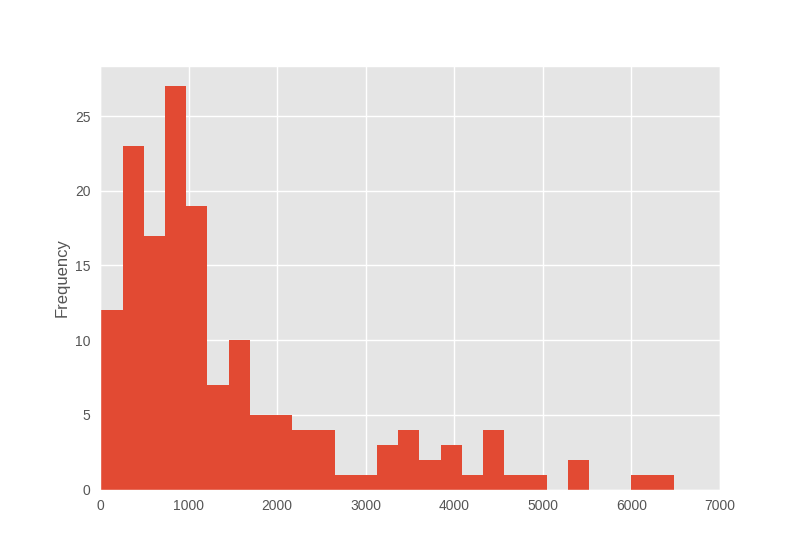

In [43]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

So we see that the most common daily sales revenue in EIRE is 1000 GBP per day

 ### Customizing

Using pandas `.plot` as it is is good enough for when doing data analysis (remember, data understanding is one of the main goals of data visualization). 

However, when we want to share a chart with someone else (wether that person is another data scientist or someone without a technical background), we need to take more steps in order to provide the most effective visualizations.

![xkcd labels strip](https://imgs.xkcd.com/comics/convincing.png)

When producing charts for external use, always remember:

- Add a title describing the chart
- Add labels for all the axes.
- Check the axes limits to make sure they are appropriate and help convey the right information
- Add legends if necessary (when dealing with multiple groups)
- Make sure the color palette you choose will display properly on the medium where it is going to be consumed (for example, which color is the background where the chart will be inserted affects how the chart is visualized)
- It is good practice, specially if the chart is to be displayed publicly (and thus probably isolated from its original document) to add a footnote to the chart adding the source of the data. 

#### Styles

Pandas uses matplotlib as a plotting backend. Thus, we can use matplotlib styles and api to modify our 

We can change the style and make use of all of matplotlib styles

In [44]:
plt.style.available

['seaborn-dark-palette',
 'ggplot',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-white',
 'bmh',
 'seaborn-pastel',
 'grayscale',
 'seaborn-colorblind',
 'classic',
 'fivethirtyeight',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-paper']

In [45]:
plt.style.use('seaborn')

<IPython.core.display.Javascript object>


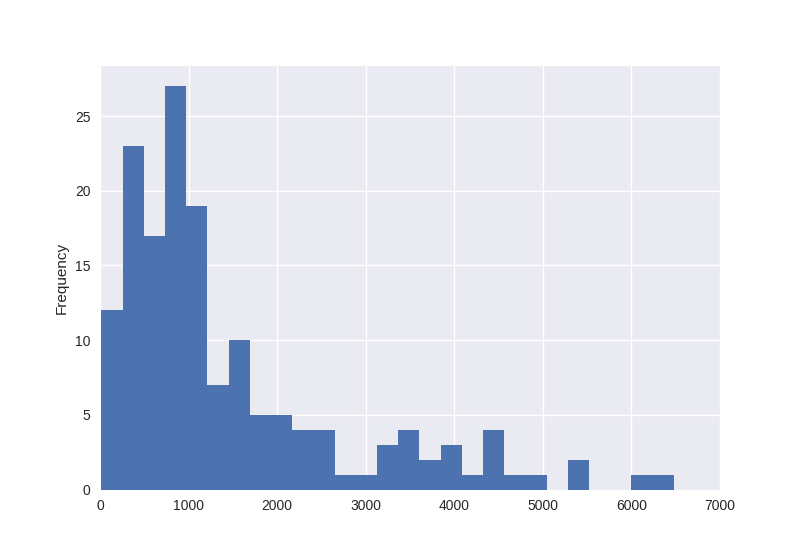

In [46]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

We can see that now the plot has a completely different set of fonts, color and sizes

**Be warned!** 

Different styles might not render the same results

<IPython.core.display.Javascript object>


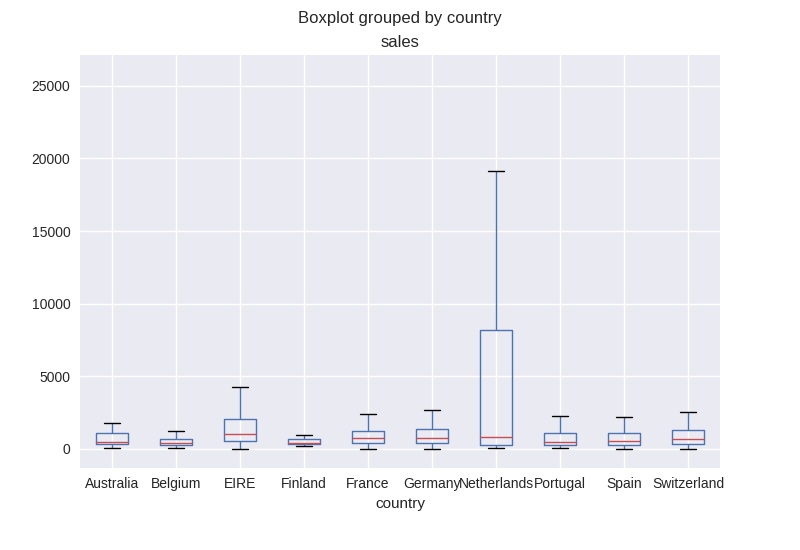

In [47]:
data.boxplot(column="sales", by="country");

For example, we see that the `seaborn` style does not display the outliers on the boxplots, so you might be mislead into believing that there are no outliers just because of how the plot style is setup!

#### Labels and titles

Finally, if we wanted to share our plot with someone else (to display on a paper or to share with a client) we can make use of matplotlib customization to make our plot more explicit and nicer looking

In [48]:
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


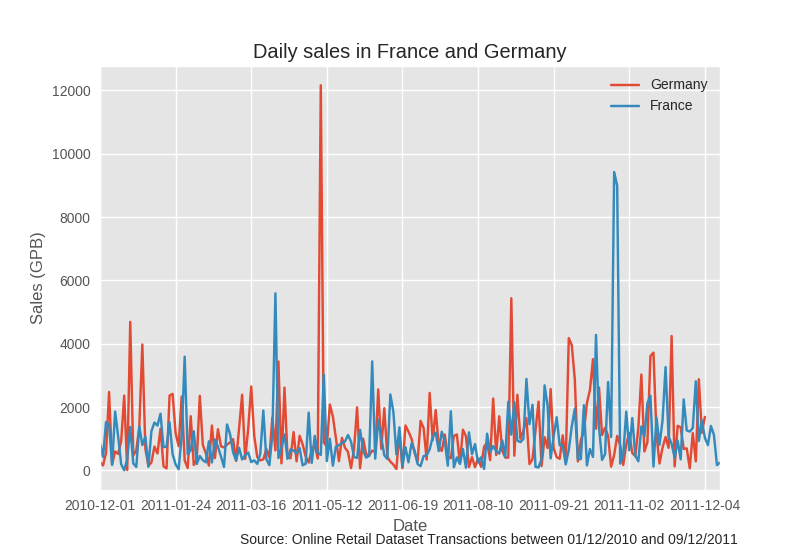

In [49]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend()
plt.title("Daily sales in France and Germany")
plt.xlabel("Date")
plt.ylabel("Sales (GPB)")
plt.figtext(.3, .01, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011");